In [2]:
# 効用値取得⇒MMRWの重み取得⇒リグレットの変化を出力⇒その後傾き変更の内区間でのやつ

In [3]:
include("plot_regret_transition.jl")
include("file_operate.jl")
include("calc_IPW.jl")
include("not_necessary/display-crisp-matrix.jl")

matrixLaTeXString (generic function with 1 method)

In [4]:
#ファイルからの読み取り
utility= read_utility_value()

100-element Vector{Any}:
 [0.001251 0.192047 … 0.223724 0.191284; 0.350281 0.129578 … 0.07312 0.104065; … ; 0.014984 0.076416 … 0.198547 0.635559; 0.004669 0.004242 … 0.542816 0.011505]
 [0.377869 0.153778 … 0.005402 0.392853; 0.057037 0.109192 … 0.21225 0.336975; … ; 0.539337 0.187317 … 0.030182 0.044128; 0.142334 0.067261 … 0.400146 0.137787]
 [0.611481 0.168152 … 0.002899 0.000336; 0.023743 0.242462 … 0.447693 0.159882; … ; 0.272888 0.002991 … 0.2276 0.081238; 0.205353 0.279572 … 0.093872 0.162415]
 [0.108276 0.34967 … 0.204712 0.050873; 0.385223 0.187164 … 0.126038 0.265015; … ; 0.168976 0.176575 … 0.238434 0.01004; 0.063538 0.428345 … 0.04245 0.300262]
 [0.141571 0.00592 … 0.044464 0.050446; 0.070374 0.232666 … 0.283417 0.033417; … ; 0.155548 0.022339 … 0.313263 0.182831; 0.279572 0.126007 … 0.049774 0.268005]
 [0.123016 0.244781 … 0.033936 0.244171; 0.035095 0.391113 … 0.171692 0.165344; … ; 0.316864 0.058105 … 0.375244 0.153046; 0.271881 0.025909 … 0.243774 0.017059]
 [0.195984 

In [5]:
#ファイルからの読み取り
trueW= read_true_weights("A" )

(L = [0.21, 0.17, 0.14, 0.1, 0.07, 0.04], R = [0.25, 0.23, 0.22, 0.2, 0.19, 0.18])

In [6]:
#ファイルからの読み取り
i = 1
methodW = read_method_weights("A/MMRW", i,6);
println(methodW[1])

(L = [0.150363, 0.150363, 0.073647, 0.075181, 0.050121, 0.037591], R = [0.338316, 0.338316, 0.196392, 0.207397, 0.165918, 0.216395], adjacent = 0.925469)


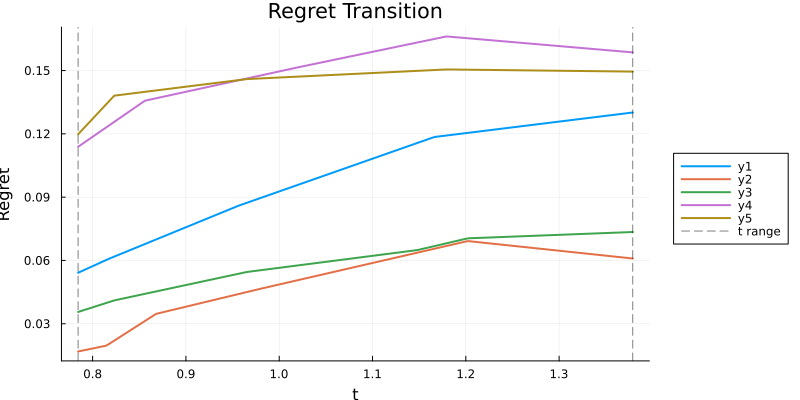

MethodError: MethodError: no method matching (::Colon)(::Float64, ::Vector{Int64})

Closest candidates are:
  (::Colon)(::T, ::Any, !Matched::T) where T<:Real
   @ Base range.jl:45
  (::Colon)(::A, ::Any, !Matched::C) where {A<:Real, C<:Real}
   @ Base range.jl:10
  (::Colon)(::T, ::Any, !Matched::T) where T
   @ Base range.jl:44
  ...


In [ ]:
t_range = find_optimal_trange(methodW[1].L,methodW[1].R)
num = [1]
# プロット生成
# for i in num
    p = plot_regret_transition(utility[1], methodW, t_range)
    display(p)
# end


In [ ]:
#最適解の範囲を計算
tᴸ,tᴿ= find_optimal_trange(methodW[1].L,methodW[1].R)
println(tᴸ, " ", tᴿ) 
t = Float64[]
iₜ = 1 ;push!(t, tᴿ);           #tᴿを追加

Yᴸ,Yᴿ=(methodW[1].L .* t[iₜ],methodW[1].R .* t[iₜ])

0.7844484660502471 1.378893823796674


([0.20733461202753928, 0.20733461202753928, 0.10155139344115365, 0.10366661656685774, 0.06911153734251309, 0.05183399773034077], [0.4665018428915955, 0.4665018428915955, 0.2708037158430764, 0.28597844237395875, 0.22878330545669656, 0.29838572900048127])

In [ ]:
# 5x5のタプルを生成する
regret_mat_reserve = Vector{Matrix{minimax_regret_tuple}}(undef, 5)     #5x5のタプルを保存する配列を定義
regret_mat_reserve[iₜ] = create_minimax_R_Matrix(utility[1]);            #タプルを作成する関数を呼び出し、配列に保存 
println(regret_mat_reserve[1][1,4])

minimax_regret_tuple([0.013733, -0.115631, -0.314362, -0.0028380000000000002, -0.025177000000000005, 0.444275], [6, 1, 4, 5, 2, 3], 0.0, 0, 0.0)


In [19]:
#ここから、regretの計算と比較を行う
r_vector = Vector{Float64}(undef, 5);
regret_max = Vector{Vector{Any}}(undef, 5);rank_regret = Vector{Vector{Any}}(undef, 5); #最大値と順位を保存する配列を定義
regret_max[iₜ],rank_regret[iₜ] = calc_regret(regret_mat_reserve[iₜ], Yᴸ, Yᴿ)                              #タプルの要素を計算する関数を呼び出し
    println((regret_max[iₜ]))           #タプルの確認
    println((rank_regret[iₜ]))          #タプルの確認

min_availspace = findmin([regret_mat_reserve[iₜ][i,j].Avail_space for i in 1:5, j in 1:5 if j != i])

display("text/latex", matrixLaTeXString([regret_mat_reserve[iₜ][i,j].Avail_space for i in 1:5, j in 1:5 ]))

r_vector[iₜ] =  1 / (1 + min_availspace[1])
println(r_vector[iₜ], " ", min_availspace[1])

Any[(0.1301084955965026, 2), (0.06091517398606492, 4), (0.07347093889569913, 4), (0.1586059111482187, 2), (0.14949535187302043, 2)]
Any[3, 1, 2, 5, 4]
0.9347918557168784 0.06975685965204997


In [ ]:

#ここから、regretの計算と比較を行う
    r_vector = Vector{Float64}(undef, 5);
    regret_max = Vector{Vector{Any}}(undef, 5);rank_regret = Vector{Vector{Any}}(undef, 5); #最大値と順位を保存する配列を定義
    regret_max[iₜ],rank_regret[iₜ] = calc_regret(regret_mat_reserve[iₜ], Yᴸ, Yᴿ)                              #タプルの要素を計算する関数を呼び出し
        println((regret_max[iₜ]))           #タプルの確認
        println((rank_regret[iₜ]))          #タプルの確認

    min_availspace = findmin([regret_mat_reserve[iₜ][i,j].Avail_space for i in 1:5, j in 1:5 if j != i])

    display("text/latex", matrixLaTeXString([regret_mat_reserve[iₜ][i,j].Avail_space for i in 1:5, j in 1:5 ]))

    r_vector[iₜ] =  1 / (1 + min_availspace[1])
    println(r[iₜ], " ", min_availspace[1])
    #二回目
    regret_mat_reserve[iₜ + 1] = deepcopy(regret_mat_reserve[iₜ])
    regret_max[iₜ+1],rank_regret[iₜ+1] = calc_regret(regret_mat_reserve[iₜ + 1], r_vector[iₜ]*Yᴸ, r_vector[iₜ]*Yᴿ)
    println((regret_max[iₜ+1]))           #タプルの確認
    println((rank_regret[iₜ+1]))          #タプルの確認
    min_availspace = findmin([regret_mat_reserve[iₜ+1][i,j].Avail_space for i in 1:5, j in 1:5 if j != i])
    display("text/latex", matrixLaTeXString([regret_mat_reserve[iₜ+1][i,j].Avail_space for i in 1:5, j in 1:5 ]))

    r_vector[iₜ+1] =  1 / (1 + min_availspace[1])
    println(r, " ", min_availspace[1])
    #三回目
    regret_mat_reserve[iₜ + 2] = deepcopy(regret_mat_reserve[iₜ + 1])
    regret_max[iₜ+2],rank_regret[iₜ+2] = calc_regret(regret_mat_reserve[iₜ + 2],r_vector[iₜ]*r_vector[iₜ+1]*Yᴸ, r_vector[iₜ]*r_vector[iₜ+1]*Yᴿ)
    println((regret_max[iₜ+2]))           #タプルの確認
    println((rank_regret[iₜ+2]))          #タプルの確認
    min_availspace = findmin([regret_mat_reserve[iₜ+2][i,j].Avail_space for i in 1:5, j in 1:5 if j != i])
    display("text/latex", matrixLaTeXString([regret_mat_reserve[iₜ+2][i,j].Avail_space for i in 1:5, j in 1:5 ]))

    r_vector[iₜ+2] =  1 / (1 + min_availspace[1])
    println(r, " ", min_availspace[1])

0.7844484660502471 1.378893823796674
Any[(0.1301084955965026, 2), (0.06091517398606492, 4), (0.07347093889569913, 4), (0.1586059111482187, 2), (0.14949535187302043, 2)]
Any[3, 1, 2, 5, 4]


0.9879393183823838 0.06975685965204997
Any[(0.12519842043134385, 2), (0.06512187044474921, 4), (0.07194755021345489, 4), (0.16201043415510022, 2), (0.14995576363481689, 2)]
Any[3, 1, 2, 5, 4]


0.9879393183823838 0.012207917422867531
Any[(0.1243494881029545, 2), (0.06584919141222419, 4), (0.07168416241234007, 4), (0.16259906254592318, 2), (0.15003536698421838, 2)]
Any[3, 1, 2, 5, 4]


0.9879393183823838 0.059326685165399795


In [55]:

sum((Yᴸ .* methodW.L[1,:])) #これ使える
display("text/latex", matrixLaTeXString(utility[1]))

[0.0034180000000000005, -0.187805, -0.260102, 0.30517599999999995, 0.31909199999999993, -0.17977900000000002]


In [5]:
##ひとつの真の重要度の組に対するプログラムの繰り返し回数(100回)
repeat_num = 100;
#代替案の個数（6個）
criteria_num = 6;
#効用値行列の個数（100個）
utility_matrix_num = 100;
#５タイプの真の重要度区間
weight_type = ["A","B","C","D","E",];
method_name_list = [
    "/WWMIN","/AMRD","/AMRW","/AMRWW","/DMIN","/E-AMRD","/E-AMRW",
    "/E-AMRWW","/E-DMIN","/E-MMRD","/E-MMRW","/E-MMRWW","/EV","/E-WMIN",
    "/E-WWMIN","/G-AMRD","/G-AMRW","/G-AMRWW","/G-DMIN","/GM","/G-MMRD",
    "/G-MMRW","/G-MMRWW","/G-WMIN","/G-WWMIN","/MMRD","/MMRW","/MMRWW","/WMIN",
];#手法29種類

In [34]:
#効用値読み取り5行6列ごとに2次元配列としてデータが格納
utilityval_for_alta = read_utility_value()
for type in weight_type     #A-Eでループ
    #真の区間重要度を取得 trueW.L,trueW.Rとして左と右が取得できる
    trueW= read_true_weights(type * "/Given_interval_weight.csv")
    for method in method_name_list
        methodW = read_method_weights(type * method, repeat_num,criteria_num)
        for i in 1:utility_matrix_num
            #効用値行列を取得
             
        end
    end
end

UndefVarError: UndefVarError: `weight_type` not defined

In [ ]:
#combiがこれで使える　5C2の組み合わせを出力とか
result = collect(combinations(1:5, 2))
println(length(result))

#表示に関するもの

display(trueW)
display("text/latex", matrixLaTeXString(methodW.L))
display("text/latex", matrixLaTeXString(methodW.R))

In [ ]:
v = [7, 0, 4,5, 8]
println(sortperm(v))
rank = sortperm(sortperm(v));
println(rank)

[2, 3, 4, 1, 5]
[4, 1, 2, 3, 5]
